In [1]:
%matplotlib inline
%load_ext autotime
%load_ext snakeviz
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import datetime as dt
from SIR_models import *
import datetime as dt

yellow = (240/255, 203/255, 105/255)
grey = (153/255, 153/255, 153/255)
faded_grey = (153/255, 153/255, 153/255, .25)
red = (220/255, 83/255, 86/255)

# Case Study for Spain, South Korea, US, Italy and Brazil

## Scenario creation

Let's take a look at total confirmed cases in late cycle examples

In [2]:
dic = {}
ct = 'Diamond Princess'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Korea, South'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Italy'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Spain'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'New Zealand'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Singapore'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Germany'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Thailand'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Japan'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'US'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

time: 913 ms


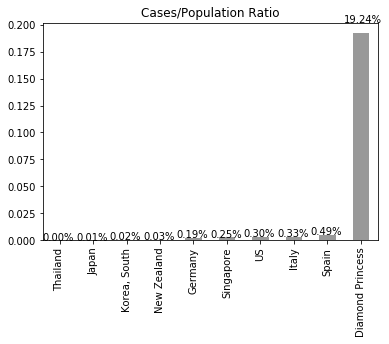

time: 225 ms


In [3]:
df = pd.Series(dic)
df.sort_values(inplace=True)
ax = df.plot.bar(color=grey, title='Cases/Population Ratio')

for i, each in enumerate(df.index):
    #for col in df.columns:
    y = df.loc[each]
    text = "{:.2%}".format(df.loc[each])
    ax.text(i-.5, y*1.05, text)

In [4]:
pd.DataFrame(pd.Series(dic).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,10.0,0.020865,0.060305,0.000042,0.000234,0.00218,0.00322,0.192432


time: 14 ms


The confirmed cases, so far, typically, are ranging from 0.01% to 0.5%, with the exception of the diamond princess.

The most open range would be 0.01%-20%. We would be confortable using a range starting at the minimum value to at least 3-5 times the max value ex-DP

# South Korea

We know that South Korea has extensively tested the population, so that its confirmed cases are more reasonable. Thus we are confortable using the confirmed cases as well to fit the model

S0p: 0.00022297422950979626
gamma_i: 0.24999999999999287
gamma_h: 0.023809523809523808
omega: 0.2
beta: 0.41047518622324963
delta: 0.4787878787878569
S0: 11323.357022970204
R0:1.6898355005271801
gamma_i: 4.000000000000115 days
gamma_h: 42.0 days
omega: 5.0 days
{'S0p': (0.0002, 0.2), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.023809523809523808, 0.047619047619047616), 'omega': (0.1, 0.2), 'beta': (0.01, 0.5), 'delta': (0, 0.47878787878787876)}

I Max:
1316.8964745288272
Est:
197.53447117932407
H Max:
161.2352868527346
R Max:
9095.948939758358
F Max:
223.78444738441283
F+R Max:
9319.73338714277


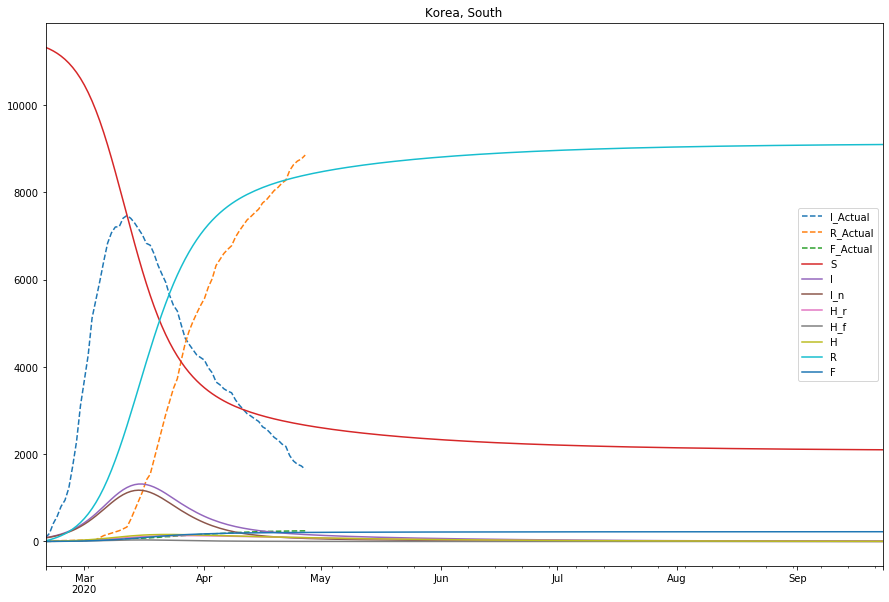

time: 1.16 s


In [14]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH(country = 'Korea, South',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.0,0.00,1],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0002, .2),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6*7), 1/(3*7)),
             'omega': (1/(10), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,4),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

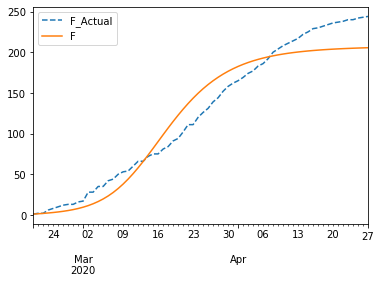

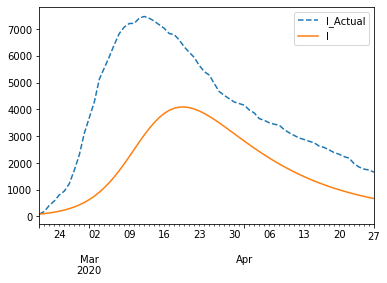

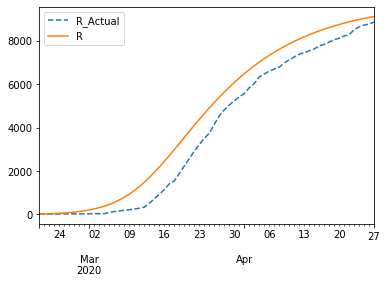

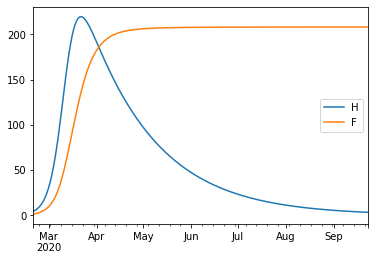

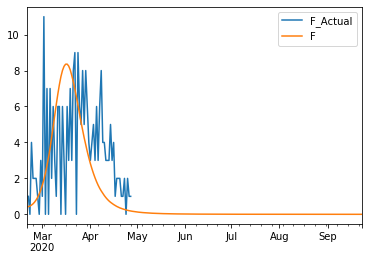

time: 1.2 s


In [6]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

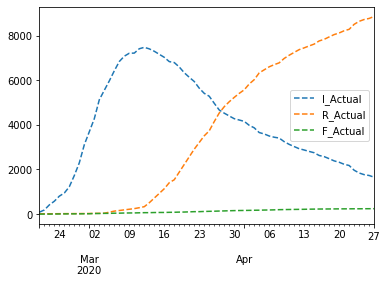

time: 342 ms


In [7]:
t1.actuals_plot()

S0p: 0.0003139787813443269
gamma_i: 0.24999999999999992
gamma_h: 0.047619047619047575
omega: 0.1999999999999999
beta: 0.41815078343874335
delta: 0.35772765786145716
S0: 15989.086226816844
R0:1.7235762000504065
gamma_i: 4.000000000000002 days
gamma_h: 21.000000000000018 days
omega: 5.000000000000003 days
MSE: 0.8535561261014621


0.8535561261014621

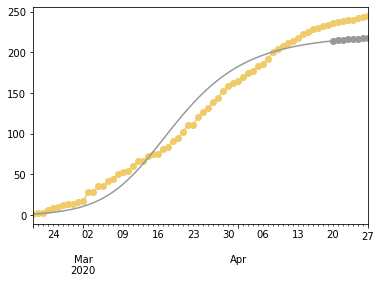

time: 1.7 s


In [8]:
days = 7
t1.outOfSample_forecast_S0(days=days)
#t1.params

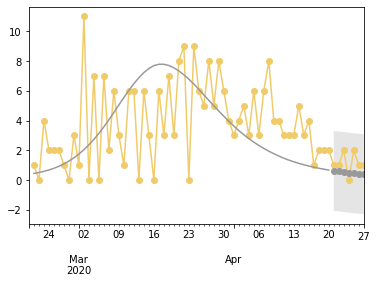

time: 386 ms


In [9]:
t1.outOfSample_plot(days=days, diff=True)

S0p: 0.0003687245804199074
gamma_i: 0.25
gamma_h: 0.04761904761904759
omega: 0.19999999999999998
beta: 0.38097065439586975
delta: 0.47878787878787876
S0: 18795.858727595612
R0:1.564375795842489
gamma_i: 4.0 days
gamma_h: 21.000000000000014 days
omega: 5.0 days
MSE: 1.6280880105967843


1.6280880105967843

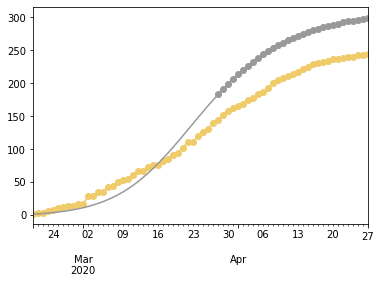

time: 1.68 s


In [10]:
days = 30
t1.outOfSample_forecast_S0(days=days)
#t1.params

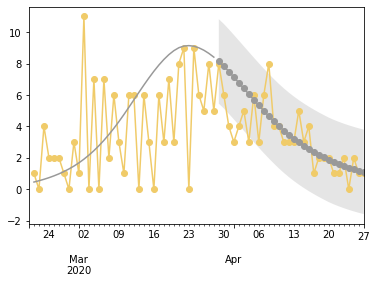

time: 499 ms


In [11]:
t1.outOfSample_plot(days=days, diff=True)

S0p: 0.0001999999999999988
gamma_i: 0.24999999999999986
gamma_h: 0.04761904761904726
omega: 0.19999999999999862
beta: 0.43132393529498975
delta: 0.47878787878787876
S0: 10145.486999999937
R0:1.7711409442100314
gamma_i: 4.000000000000003 days
gamma_h: 21.000000000000156 days
omega: 5.000000000000035 days
MSE: 2.8822269319807505


{'S0p': (0.0002, 0.2),
 'gamma_i': (0.07142857142857142, 0.25),
 'gamma_h': (0.023809523809523808, 0.047619047619047616),
 'omega': (0.1, 0.2),
 'beta': (0.01, 0.5),
 'delta': (0, 0.47878787878787876)}

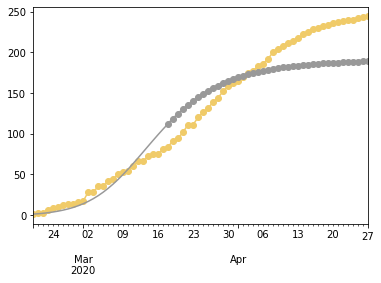

time: 1.83 s


In [12]:
days = 40
t1.outOfSample_forecast_S0(days=days)
#t1.params
t1.parameter_bounds

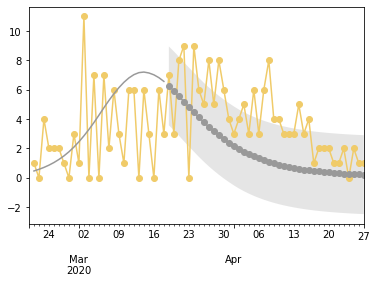

time: 604 ms


In [13]:
t1.outOfSample_plot(days=days, diff=True)

## Italy

lambda: 1
S0p: 0.016095603796231723
delta: 0.47878787878787876
gamma_i: 0.07142857142859739
gamma_h: 0.02380952380952506
omega: 0.19999999999999543
beta1: 0.2930621032063439
beta2: 0.29306210320640225
S0: 973007.0960927019
R0:{'R0_initial': 4.000000739013417, 'R0_final': 4.0000007390142125}
gamma_i: 13.99999999999491 days
gamma_h: 41.99999999999779 days
omega: 5.000000000000115 days
{'S0p': (0.0002, 0.02), 'delta': (0, 0.47878787878787876), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.023809523809523808, 0.047619047619047616), 'omega': (0.01, 0.2), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
400316.4650571355
Est:
60047.469758570325
H Max:
19947.791625795973
R Max:
934944.4840248023
F Max:
22945.347226883958
F+R Max:
957889.8312516863


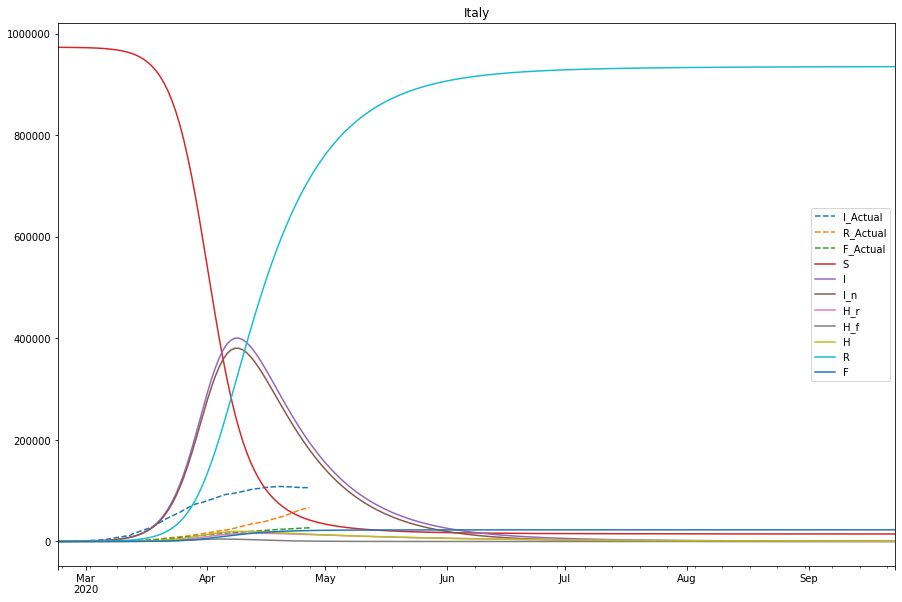

time: 2.86 s


In [65]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Italy',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.01,0.00,.90],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .015,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             'lambda': 1,
             
             
         },
        

         parameter_bounds = {
             'S0p': (.0002, .02),
             'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6*7), 1/(3*7)),
             'omega': (.01, .2),
         #    'lambda': (.5,2)
             
         },
                   
        
         
         constraints_bounds = {
             'R0': (1,4),
         },
                   
         )

t1.train_S0()
#t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

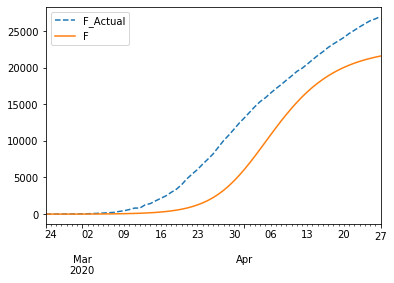

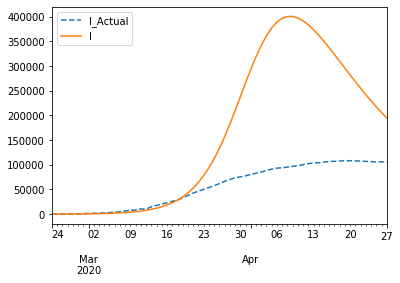

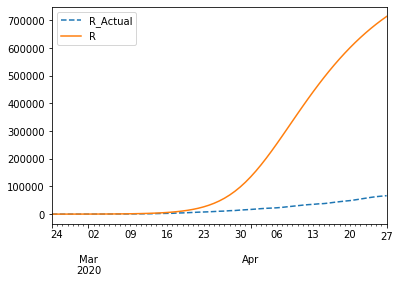

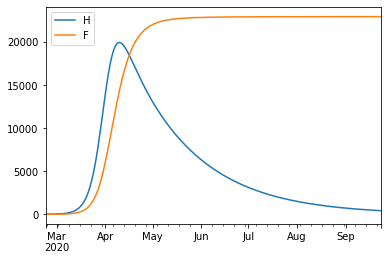

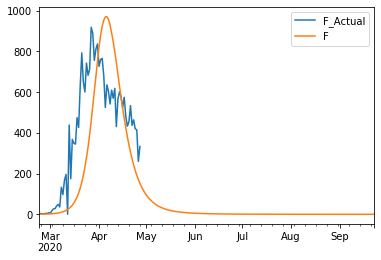

time: 1.43 s


In [66]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

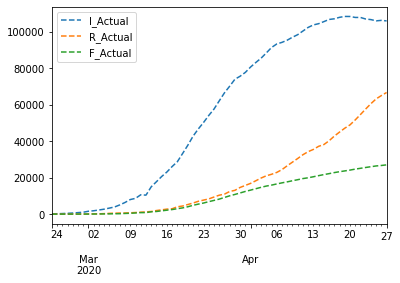

time: 403 ms


In [67]:
t1.actuals_plot()

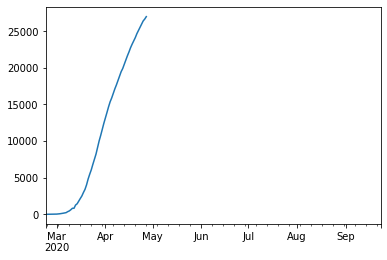

time: 258 ms


In [68]:
t1.df.F_Actual.plot()

MSE: 180.51908617676872


180.51908617676872

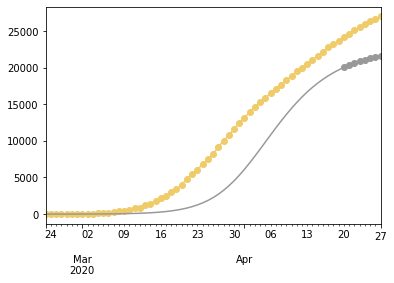

time: 918 ms


In [69]:
days = 7
t1.outOfSample_forecast(days=days)
#t1.params

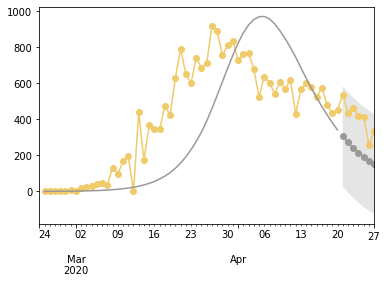

time: 309 ms


In [70]:
t1.outOfSample_plot(days=days, diff=True)

lambda: 1
S0p: 0.02
delta: 0.47878556809733713
gamma_i: 0.07142857326541058
gamma_h: 0.023809565081122898
omega: 0.19999998378159198
beta1: 0.2930619844332425
beta2: 0.2930615512536819
S0: 1209074.02
R0:{'R0_initial': 4.000000096447795, 'R0_final': 3.9999941839843016}
gamma_i: 13.999999639979537 days
gamma_h: 41.99992719702541 days
omega: 5.000000405460233 days
MSE: 333.84695274178097


333.84695274178097

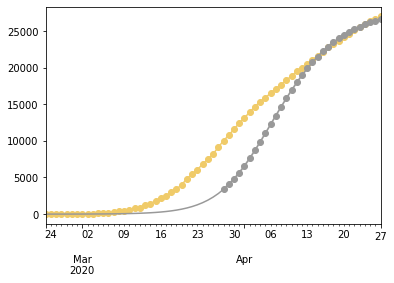

time: 1.53 s


In [71]:
days = 30
t1.outOfSample_forecast_S0(days=days)
#t1.params

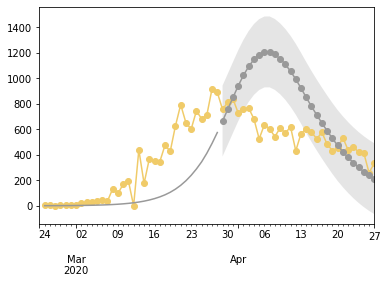

time: 288 ms


In [72]:
t1.outOfSample_plot(days=days, diff=True)

lambda: 1
S0p: 0.02
delta: 0.47878777727250477
gamma_i: 0.07142857156669659
gamma_h: 0.02380952880519144
omega: 0.1999999985068563
beta1: 0.2930620444031175
beta2: 0.2002383339591592
S0: 1209074.02
R0:{'R0_initial': 3.999999972915229, 'R0_final': 2.733050375201392}
gamma_i: 13.99999997292747 days
gamma_h: 41.99999118764415 days
omega: 5.000000037328593 days
MSE: 308.2986032615009


308.2986032615009

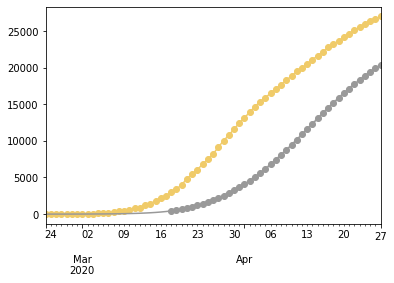

time: 1.12 s


In [73]:
days = 40
t1.outOfSample_forecast_S0(days=days)
#t1.params

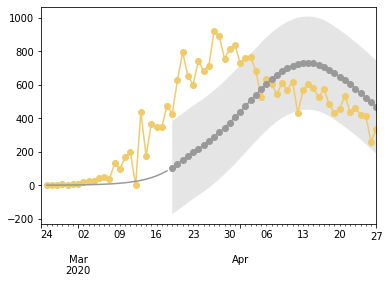

time: 293 ms


In [74]:
t1.outOfSample_plot(days=days, diff=True)

In [ ]:
         parameter_bounds = {
             'S0p': (.0002, .2),
             'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6*7), 1/(3*7)),
             'omega': (1/(10), 1/(3)),
         #    'lambda': (.5,2)
             
         },

In [11]:
* Use usual train
* loss function on diffs
* Korea has only one beta
* it is weird. Maybe we need a loss function tht gives more weight to recent values. or to higher values (to match peaks)
* Adjust plot titles - input country name and variables

SyntaxError: invalid syntax (<ipython-input-11-d7c2b4461ca9>, line 1)

time: 990 µs
